Manuela Góez Estepa


# Tercer Proyecto Computacional
## Línea 21 cm

En el siguiente proyecto se pretende estudiar dos de los brazos de la vía láctea mediante datos del espectro de Temperatura de brillo, para ello se usa el concepto de la línea de 21 cm del hidrógeno, que hace referencia a una línea característica del espectro electromagnético del hidrógeno neutro en una longitud de onda de 21 cm. Lo anterior es posible en gas interestelar pues el átomo (compuesto por protón y electrón) emite radiación en dicha longitud ante el cambio del espín del electrón al estado antiparalelo con respecto al protón.

Previo a la sección computacional, se hace la importación de librerías y lectura de datos crudos.

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lmfit.models import GaussianModel
from astropy import units as u
from astropy.constants import pc
import scipy.integrate as spi

grafica=1   #contador para numerar gráfica

In [ ]:
#Velocidades
vel=np.loadtxt('vel.txt')/1000

#Survey
#tiene en la primera fila las longitudes y de la segunda en adelante los espectros
a=np.loadtxt('21cmsurvey.txt')

#Longitudes galácticas
long=a[0]

#Espectro
spgr=a[1:]

Veamos cómo se observan los datos, incialmente se tienen 103 conjuntos de espectros, a continuación se muestra la gráfica para el primero, pero el análisis en posteriores celdas hacen referencia a la emisión de gas en el brazo principal.

<function matplotlib.pyplot.show(close=None, block=None)>

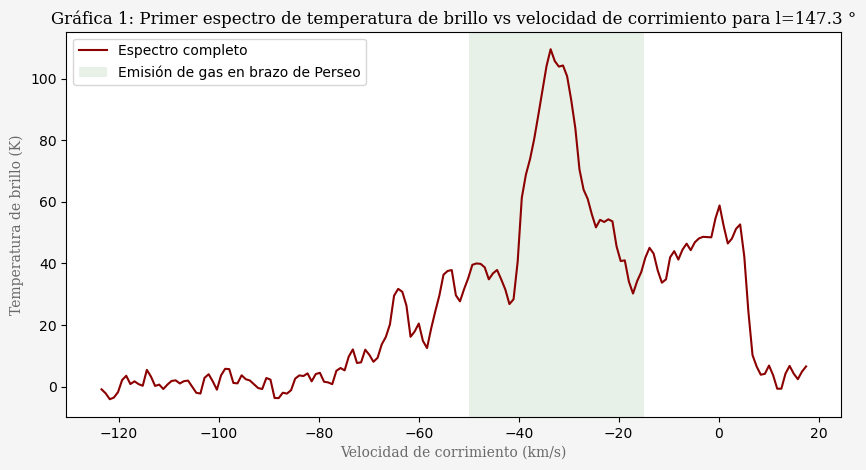

In [ ]:
plt.figure(facecolor="whitesmoke", figsize=(10,5))
plt.title(f"Gráfica {grafica}: Primer espectro de temperatura de brillo vs velocidad de corrimiento para l={long[0]:.1f} °", {'family':'serif','color':'black','size':12}); grafica+=1
plt.plot(vel,spgr[:,0], color="darkred",label="Espectro completo")
plt.axvspan(-50,-15, color='darkseagreen', alpha=0.2, lw=0, label="Emisión de gas en brazo de Perseo")
plt.xlabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()
plt.show

## Ajuste de datos mediante una función gaussiana

Para hacer el ajuste gaussiano a la sección del espectro del brazo de Perseo, se hace un corte en los datos, que sólo considere el intervalo de velocidades solicitadas $(-50,-15) \  [km/s]$. Además se usa la librería *lmfit* para plantear el Modelo Gaussiano.

In [ ]:
#Para seleccionar los datos se usa una máscara de booleanos que cumpla la condición   (−50,−15) [𝑘𝑚/𝑠]
condicion = (vel>=-50) & (vel<=-15)

#Los arreglos cortados
vel_perseo=vel[condicion]
spgr_perseo=spgr[condicion,:]

<function matplotlib.pyplot.show(close=None, block=None)>

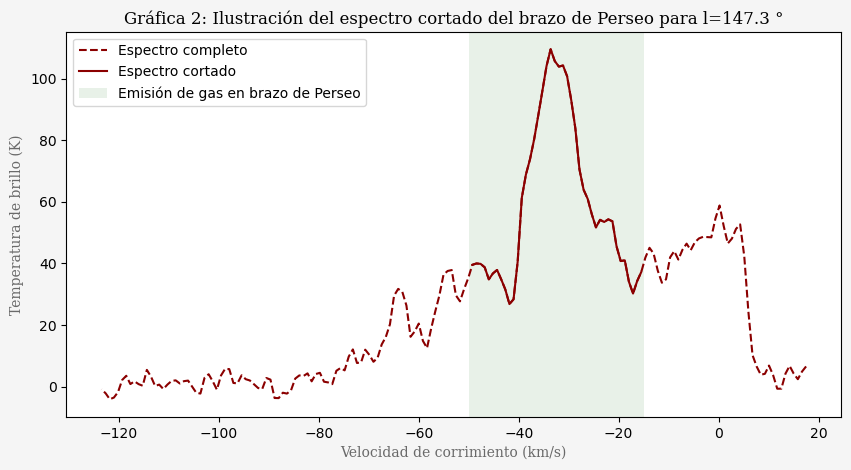

In [ ]:
plt.figure(facecolor="whitesmoke", figsize=(10,5))
plt.title(f"Gráfica {grafica}: Ilustración del espectro cortado del brazo de Perseo para l={long[0]:.1f} °", {'family':'serif','color':'black','size':12}); grafica+=1
plt.plot(vel,spgr[:,0], "--", color="darkred",label="Espectro completo")
plt.plot(vel_perseo,spgr_perseo[:,0], color="darkred",label="Espectro cortado")
plt.axvspan(-50,-15, color='darkseagreen', alpha=0.2, lw=0, label="Emisión de gas en brazo de Perseo")
plt.xlabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()
plt.show

In [ ]:
#Haciendo el ajuste para la primera longitud
modelo = GaussianModel()
parametros = modelo.make_params(amplitude=np.max(spgr_perseo[:,0]), center=np.mean(vel_perseo), sigma=1)

In [ ]:
#Para realizar el ajuste
resultado = modelo.fit(spgr_perseo[:,0], parametros, x=vel_perseo)

<function matplotlib.pyplot.show(close=None, block=None)>

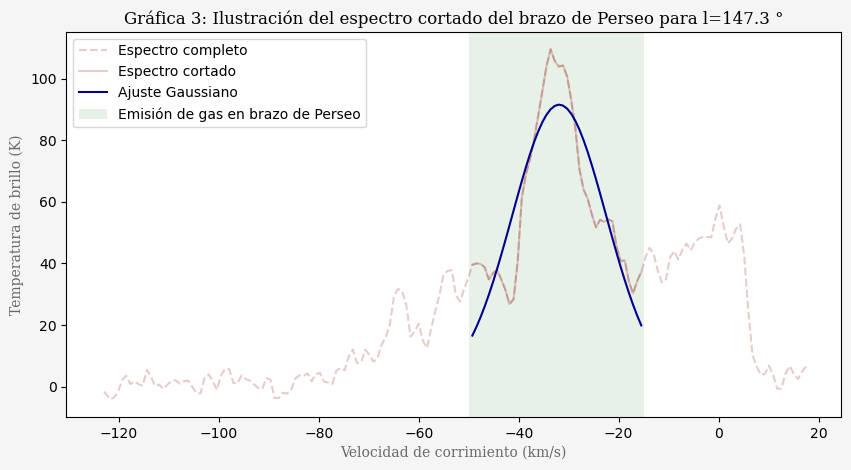

In [ ]:
#Graficando el ajuste
plt.figure(facecolor="whitesmoke", figsize=(10,5))
plt.title(f"Gráfica {grafica}: Ilustración del espectro cortado del brazo de Perseo para l={long[0]:.1f} °", {'family':'serif','color':'black','size':12}); grafica+=1
plt.plot(vel,spgr[:,0], "--", color="darkred",alpha=0.2,label="Espectro completo")
plt.plot(vel_perseo,spgr_perseo[:,0], color="darkred",alpha=0.2, label="Espectro cortado")
plt.plot(vel_perseo,resultado.best_fit, color="darkblue",label="Ajuste Gaussiano")
plt.axvspan(-50,-15, color='darkseagreen', alpha=0.2, lw=0, label="Emisión de gas en brazo de Perseo")
plt.xlabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()
plt.show

Sin embargo, cabe aclarar que en los extremos del espectro hay picos secundarios que probablemente son sesgos provenientes de otros brazos de la galaxia, en cuyo caso, cuando se hace el ajuste sólo sobre el rango de velocidades mencionado, se estaría asumiendo que todo ese espectro es netamente del brazo a analizar.

Por lo tanto, se propone un método de corte alternativo, en el que la Temperatura de brillo para velocidades fuera del rango es equivalente a 0; por lo que la función a ajustar sería nula y en los valores $-50 y -15 \  [km/s]$ se evidenciaría una discontinuidad, por lo que el modelo lo tomaría como un "error" y buscaría ajustarse lo mejor posible a los datos cerca al pico.

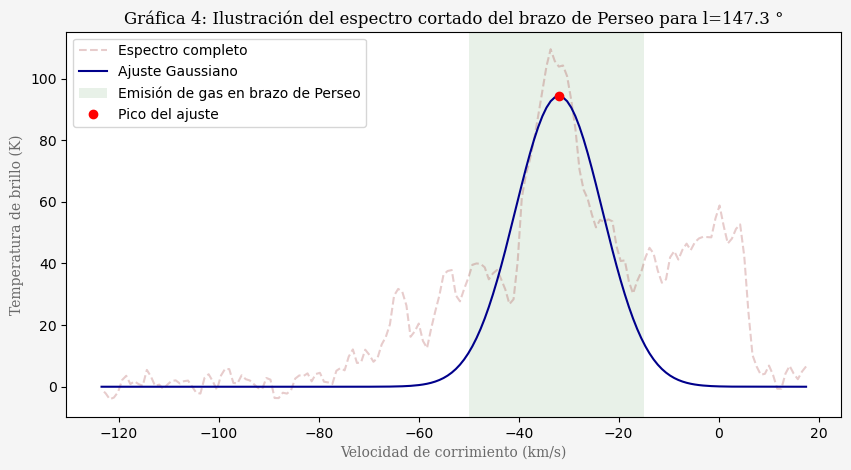

In [ ]:
vel_perseo=np.copy(vel)
spgr_perseo=np.copy(spgr)

spgr_perseo[~condicion]=0   #aquellos que no cumplen la condición son cero

#Haciendo el ajuste para la primera longitud
modelo = GaussianModel()
parametros = modelo.make_params(amplitude=np.max(spgr_perseo[:,0]), center=np.mean(vel_perseo), sigma=1)

#Para realizar el ajuste
resultado = modelo.fit(spgr_perseo[:,0], parametros, x=vel_perseo)

#Graficando el ajuste
plt.figure(facecolor="whitesmoke", figsize=(10,5))
plt.title(f"Gráfica {grafica}: Ilustración del espectro cortado del brazo de Perseo para l={long[0]:.1f} °", {'family':'serif','color':'black','size':12}); grafica+=1
plt.plot(vel,spgr[:,0], "--", color="darkred",alpha=0.2,label="Espectro completo")
plt.plot(vel_perseo,resultado.best_fit, color="darkblue",label="Ajuste Gaussiano")
plt.axvspan(-50,-15, color='darkseagreen', alpha=0.2, lw=0, label="Emisión de gas en brazo de Perseo")
plt.plot(resultado.params['center'].value,np.max(resultado.best_fit),"ro", label="Pico del ajuste")
plt.xlabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()

Se procede a hacer el ajuste para todas las longitudes galácticas.

In [ ]:
#función para obtener mínimo, máximo  y valor medio del mejor ajuste
def ajuste(l):

    modelo = GaussianModel()
    parametros = modelo.make_params(amplitude=np.max(spgr_perseo[:,l]), center=np.mean(vel_perseo), sigma=1)
    resultado = modelo.fit(spgr_perseo[:,l], parametros, x=vel_perseo)

    #Para la desviación estándar del ajuste
    sigma= resultado.params['sigma'].value

    #el mínimo se debe considerar dentro de los índices que estaban dentro del rango de velocidades.
    return np.min(resultado.best_fit[condicion]),np.max(resultado.best_fit),resultado.params['center'].value, sigma

In [ ]:
#Arreglos para llenar los valores de todas las longitudes
minimos = np.zeros(len(long))
maximos = np.zeros(len(long))
vLOSs = np.zeros(len(long))
sigmas = np.zeros(len(long))

In [ ]:
#Para todas las longitudes
for i in range(len(long)):
    minimos[i], maximos[i], vLOSs[i], sigmas[i] = ajuste(i)

Text(0, 0.5, 'Velocidad de corrimiento (km/s)')

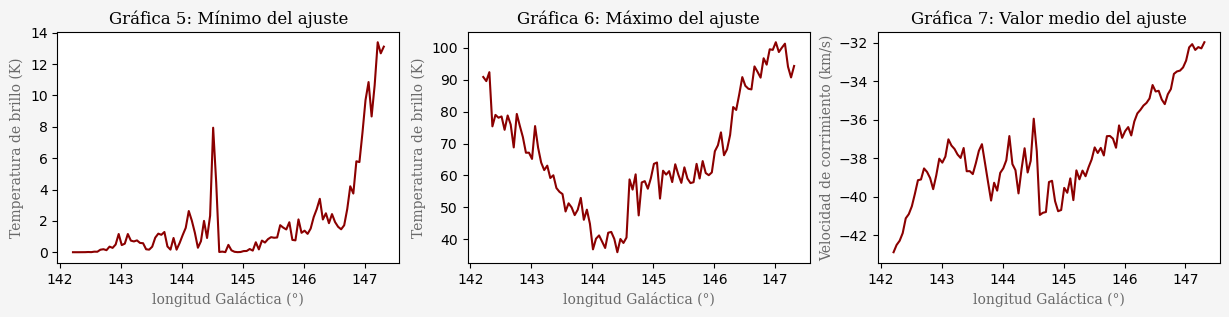

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,3), facecolor="whitesmoke")

axes[0].set_title(f"Gráfica {grafica}: Mínimo del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[0].plot(long, minimos, color="darkred")
axes[0].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[0].set_ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})

axes[1].set_title(f"Gráfica {grafica}: Máximo del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[1].plot(long, maximos, color="darkred")
axes[1].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[1].set_ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})

axes[2].set_title(f"Gráfica {grafica}: Valor medio del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[2].plot(long, vLOSs, color="darkred")
axes[2].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[2].set_ylabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})

## Radio respecto al centro de la galaxia.

Como se demostró en la primera parte, el radio al centro de la galaxia está dado como:

$$R=R_\odot \frac{v_\odot sin (l)}{v_{LOS}+v_\odot sin (l)}$$

Donde $R_\odot=8 \ [kpc]$ y $v_\odot=225 \ [km/s]$ son la distancia y velocidad del sol respecto centro de la galaxia, $l$ es longitud galáctica, $v_{LOS}$ es la velocidad del objeto sobre la línea de visión.

Como para $v_{LOS}$ se tiene una desviación estándar $\sigma$, para establecer un intervalo de confianza se hace propagación de errores sobre $R$, mediante derivada.

\begin{aligned}
\delta R &= \left|\frac{\partial}{\partial v_{LOS}}R\right|\delta v_{LOS}\\
\delta R &= \left|\frac{\partial}{\partial v_{LOS}}\left(R_\odot \frac{v_\odot sin (l)}{v_{LOS}+v_\odot sin (l)}\right)\right|\delta v_{LOS}\\
\delta R &= \left|-\frac{R_\odot v_\odot sin (l)}{\left(v_{LOS}+v_\odot sin (l)\right)^2}\right|\delta v_{LOS}\\
\delta R &= \left|\frac{R_\odot v_\odot sin (l)}{\left(v_{LOS}+v_\odot sin (l)\right)^2}\right|\sigma\\
\end{aligned}

In [ ]:
#Longitudes en radianes
long_rad = long*np.pi/180

#Distancia Sol- GC
R_sun = 8            #kpc

#velocidade del sol. Tiene las mismas unidades de vLOSs
v_sun=225            #km/s

#Radio al GC
R = R_sun * v_sun * np.sin(long_rad)/(vLOSs + v_sun * np.sin(long_rad))

#Propagación de errores sobre R
delta_R = abs(R_sun * v_sun * np.sin(long_rad)/((vLOSs + v_sun * np.sin(long_rad))**2))*sigmas

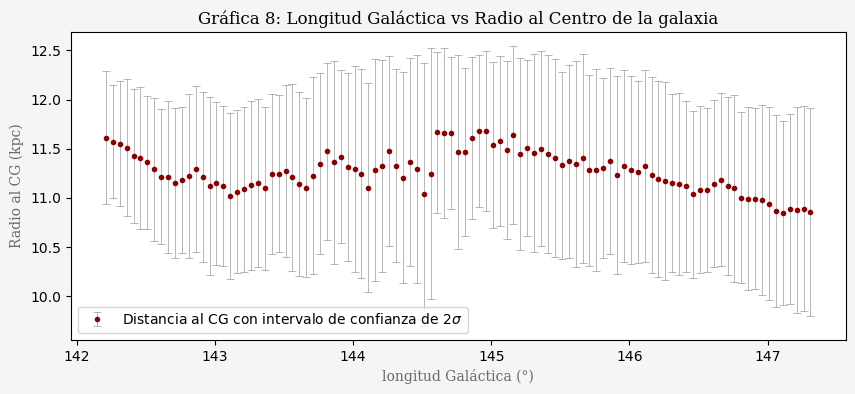

In [ ]:
plt.figure(facecolor="whitesmoke", figsize=(10,4))
plt.title(f"Gráfica {grafica}: Longitud Galáctica vs Radio al Centro de la galaxia", {'family':'serif','color':'black','size':12}); grafica+=1
plt.errorbar(long, R, yerr=delta_R, fmt='.', color="darkred",ecolor="grey", capsize=3, elinewidth=0.4, capthick=0.4, label=r"Distancia al CG con intervalo de confianza de $2\sigma$")
plt.xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Radio al CG (kpc)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()
plt.show()

## Repitiendo para el brazo externo de la galaxia

En primer lugar se identifica que el brazo externo se evidencia en la "montaña" a la izquierda del brazo de Perseo. Haciendo una visualización de la imagen del espectro, se puede observar cómo esta segunda franja se encuentra repartida entre -50 y -80 aproximadamente.

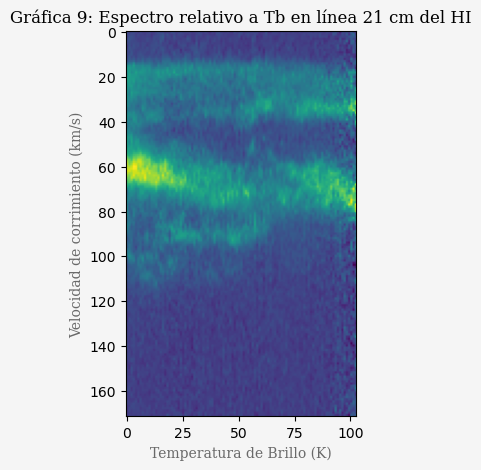

In [ ]:
plt.figure(facecolor="whitesmoke", figsize=(5,5))
plt.title(f"Gráfica {grafica}: Espectro relativo a Tb en línea 21 cm del HI", {'family':'serif','color':'black','size':12}); grafica+=1
plt.imshow(spgr)
plt.xlabel("Temperatura de Brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.show()

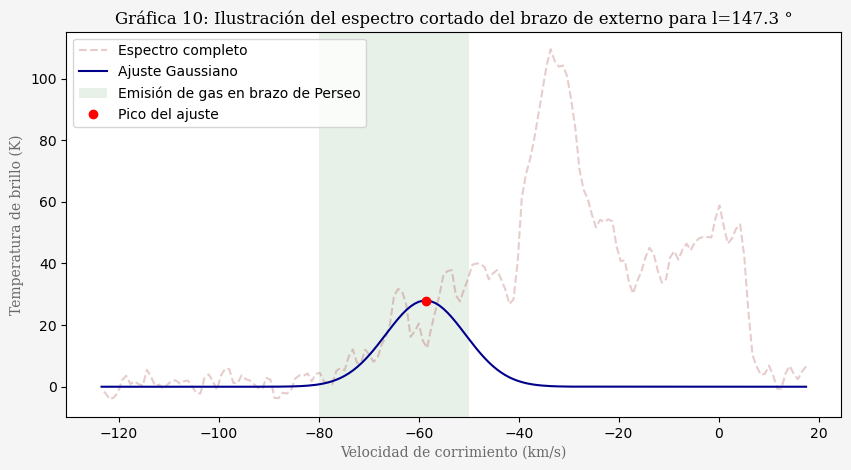

In [ ]:
#Para la primera longitud
vel_out=np.copy(vel)
spgr_out=np.copy(spgr)

#Rango de velocidades a estudiar
condicion = (vel<=-50) & (vel>=-80)

spgr_out[~condicion]=0   #aquellos que no cumplen la condición son cero

#Haciendo el ajuste para la primera longitud
modelo = GaussianModel()
parametros = modelo.make_params(amplitude=np.max(spgr_out[:,0]), center=np.mean(vel_out), sigma=1)

#Para realizar el ajuste
resultado = modelo.fit(spgr_out[:,0], parametros, x=vel_out)

#Graficando el ajuste
plt.figure(facecolor="whitesmoke", figsize=(10,5))
plt.title(f"Gráfica {grafica}: Ilustración del espectro cortado del brazo de externo para l={long[0]:.1f} °", {'family':'serif','color':'black','size':12}); grafica+=1
plt.plot(vel,spgr[:,0], "--", color="darkred",alpha=0.2,label="Espectro completo")
plt.plot(vel_out,resultado.best_fit, color="darkblue",label="Ajuste Gaussiano")
plt.axvspan(-80,-50, color='darkseagreen', alpha=0.2, lw=0, label="Emisión de gas en brazo de Perseo")
plt.plot(resultado.params['center'].value,np.max(resultado.best_fit),"ro", label="Pico del ajuste")
plt.xlabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()

In [ ]:
#función para obtener mínimo, máximo  y valor medio del mejor ajuste
def ajuste(l):

    modelo = GaussianModel()
    parametros = modelo.make_params(amplitude=np.max(spgr_out[:,l]), center=np.mean(vel_out), sigma=1)
    resultado = modelo.fit(spgr_out[:,l], parametros, x=vel_out)

    #Para la desviación estándar del ajuste
    sigma= resultado.params['sigma'].value

    #el mínimo se debe considerar dentro de los índices que estaban dentro del rango de velocidades.
    return np.min(resultado.best_fit[condicion]),np.max(resultado.best_fit),resultado.params['center'].value, sigma

In [ ]:
#Arreglos para llenar los valores de todas las longitudes
minimos = np.zeros(len(long))
maximos = np.zeros(len(long))
vLOSs = np.zeros(len(long))
sigmas = np.zeros(len(long))

In [ ]:
#Para todas las longitudes
for i in range(len(long)):
    minimos[i], maximos[i], vLOSs[i], sigmas[i] = ajuste(i)

Text(0, 0.5, 'Velocidad de corrimiento (km/s)')

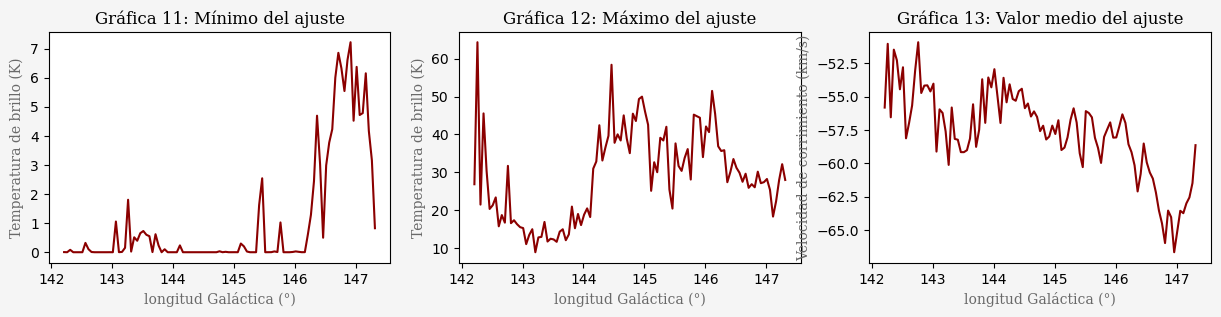

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,3), facecolor="whitesmoke")

axes[0].set_title(f"Gráfica {grafica}: Mínimo del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[0].plot(long, minimos, color="darkred")
axes[0].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[0].set_ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})

axes[1].set_title(f"Gráfica {grafica}: Máximo del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[1].plot(long, maximos, color="darkred")
axes[1].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[1].set_ylabel("Temperatura de brillo (K)",{'family':'serif','color':'dimgrey','size':10})

axes[2].set_title(f"Gráfica {grafica}: Valor medio del ajuste", {'family':'serif','color':'black','size':12}); grafica+=1
axes[2].plot(long, vLOSs, color="darkred")
axes[2].set_xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
axes[2].set_ylabel("Velocidad de corrimiento (km/s)",{'family':'serif','color':'dimgrey','size':10})

In [ ]:
#Radio al GC
R = R_sun * v_sun * np.sin(long_rad)/(vLOSs + v_sun * np.sin(long_rad))

#Propagación de errores sobre R
delta_R = abs(R_sun * v_sun * np.sin(long_rad)/((vLOSs + v_sun * np.sin(long_rad))**2))*sigmas

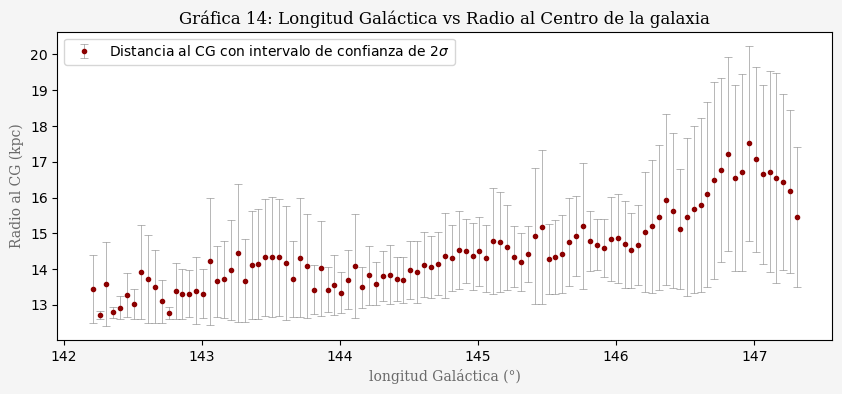

In [ ]:
plt.figure(facecolor="whitesmoke", figsize=(10,4))
plt.title(f"Gráfica {grafica}: Longitud Galáctica vs Radio al Centro de la galaxia", {'family':'serif','color':'black','size':12}); grafica+=1
plt.errorbar(long, R, yerr=delta_R, fmt='.', color="darkred",ecolor="grey", capsize=3, elinewidth=0.4, capthick=0.4, label=r"Distancia al CG con intervalo de confianza de $2\sigma$")
plt.xlabel("longitud Galáctica (°)",{'family':'serif','color':'dimgrey','size':10})
plt.ylabel("Radio al CG (kpc)",{'family':'serif','color':'dimgrey','size':10})
plt.legend()
plt.show()

## Densidad de Columna del Hidrógeno


La densidad de columna del Hidrógeno hace referencia a la cantidad de Hidrógeno que se encuentra en una columna vertical. La importancia de esta cantidad es que es útil para estudiar regiones de gas y polvo, además de analizar la absorción de luz por el Hidrógeno, entre otras aplicaciones.

La densidad de columna se calcula mediante la expresión:

\begin{equation}
N_H=1.82 \times 10^{18} \int T_b(v) dv   \ [atomos/cm^2]
\end{equation}

Para computar la integral, se usa el método de integración trapezoidal de scipy (para hacer la integral discreta), donde $T_b$ viene dado por el arreglo de mejor ajuste y $dv$ es la diferencia entre un punto de velocidad y la siguiente.

El error en $N_H$ se obtiene hallando la desviación estándar del conjunto de valores de la integral para las diferentes longitudes.

In [ ]:
#Para retornar el modelo nuevamente para cualquier brazo
def modelo(l,spgr,vel):

    modelo = GaussianModel()
    parametros = modelo.make_params(amplitude=np.max(spgr[:,l]), center=np.mean(vel), sigma=1)
    resultado = modelo.fit(spgr[:,l], parametros, x=vel)

    return resultado

In [ ]:
#paso de velocidades
dv=vel[0]-vel[1]

Primero se calcula la densidad de columna del Brazo de Perseo a partir del promedio del valor de la integral para cada longitud.

In [ ]:
#Perseo
int_perseo = np.zeros(len(long))

for i in range(len(long)):
    modelo_i = modelo(i,spgr_perseo,vel_perseo)

    #Integral
    int_perseo[i]=spi.trapz(modelo_i.best_fit,dx=dv)

std_dev = np.std(int_perseo)

N_H_perseo=1.82e18*np.mean(int_perseo)
err_perseo=1.82e18*std_dev

In [ ]:
print(f"La densidad de columna de hidrógeno es {N_H_perseo:.2E} ± {err_perseo:.2E} [atomos/cm^{2}]")

La densidad de columna de hidrógeno es 2.24E+21 ± 5.85E+20 [atomos/cm^2]


Para el brazo exterior:

In [ ]:
#Exterior
int_out = np.zeros(len(long))

for i in range(len(long)):
    modelo_i = modelo(i,spgr_out,vel_out)

    #Integral
    int_out[i]=spi.trapz(modelo_i.best_fit,dx=dv)

std_dev = np.std(int_out)

N_H_out=1.82e18*np.mean(int_out)
err_out=1.82e18*std_dev

In [ ]:
print(f"La densidad de columna de hidrógeno es {N_H_out:.2E} ± {err_out:.2E} [atomos/cm^{2}]")

La densidad de columna de hidrógeno es 7.63E+20 ± 3.22E+20 [atomos/cm^2]
